In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('../Crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [6]:
df.shape

(2200, 8)

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# To check for duplicates
df.duplicated().sum()

0

In [11]:
#Renaming columns
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

# **Distribution and Density of Values**

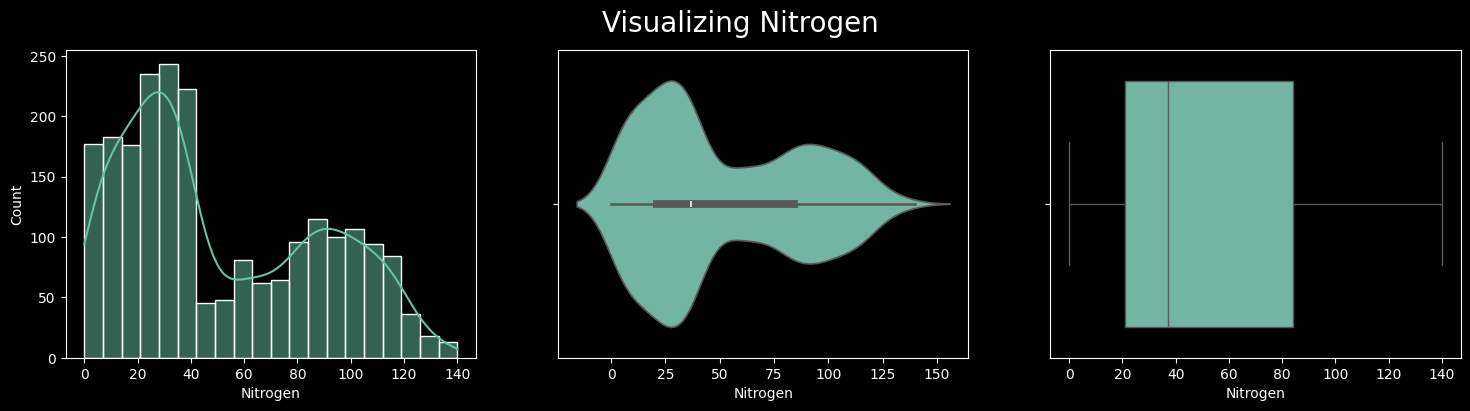

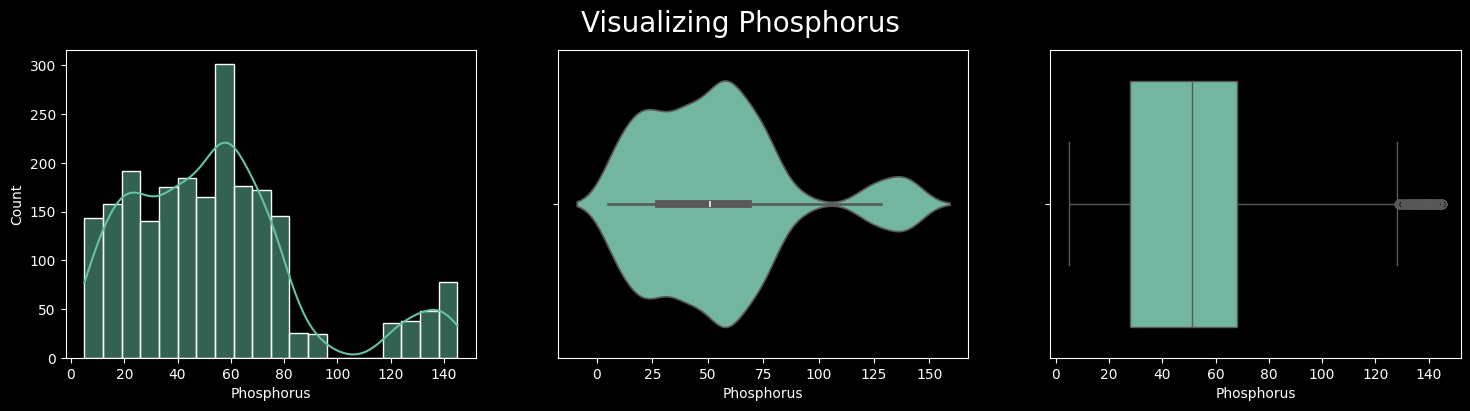

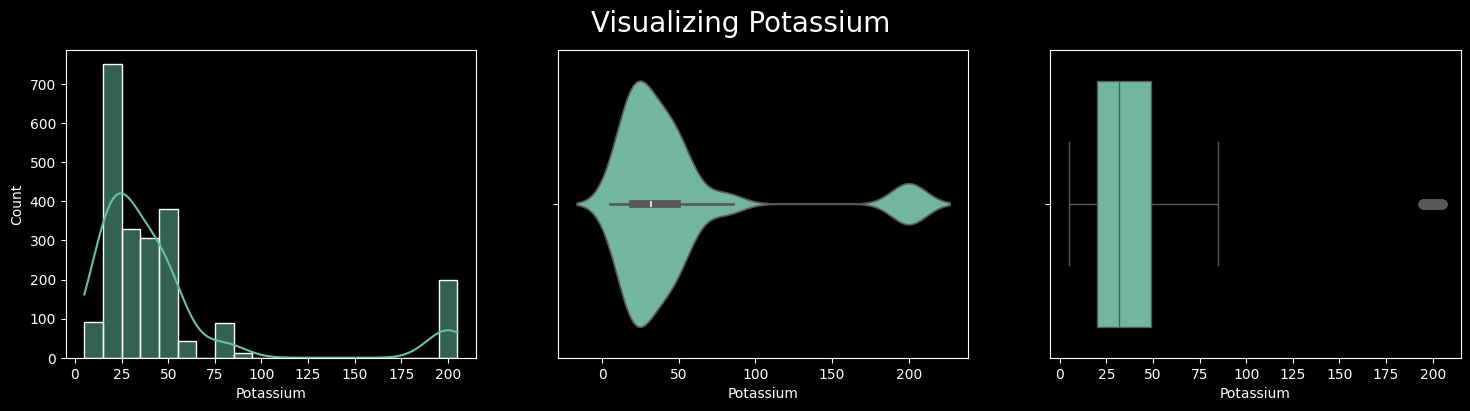

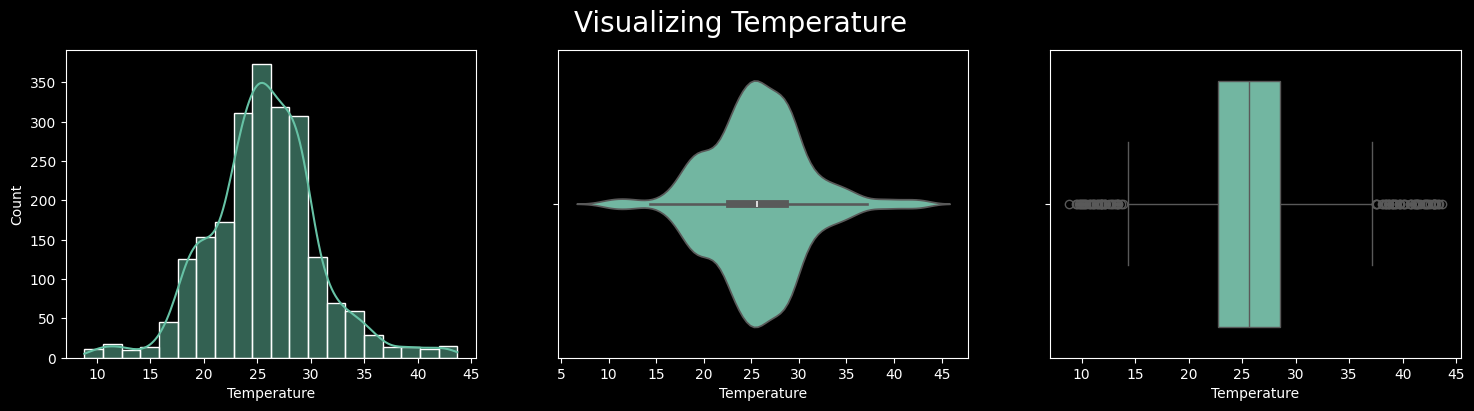

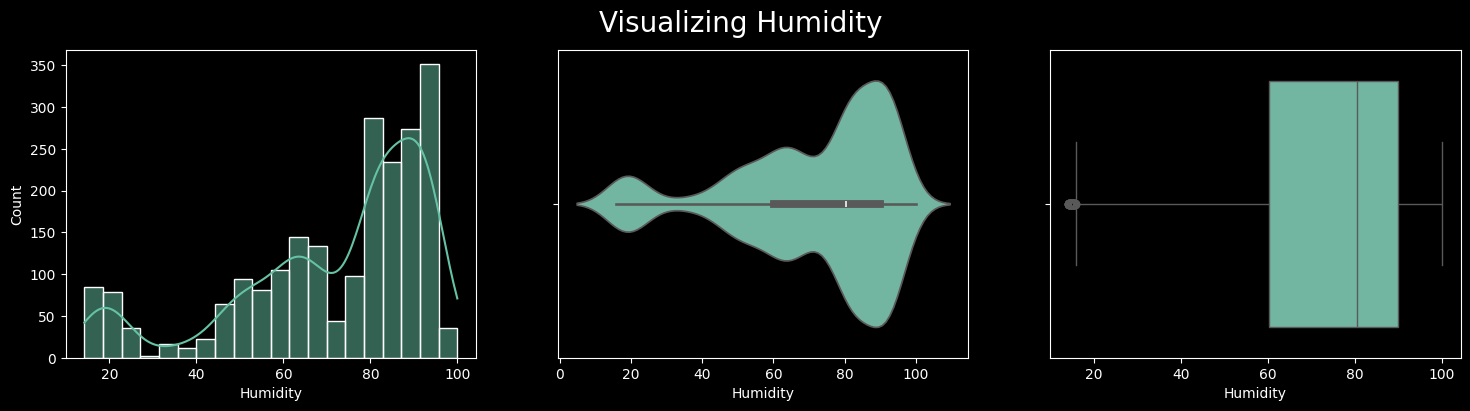

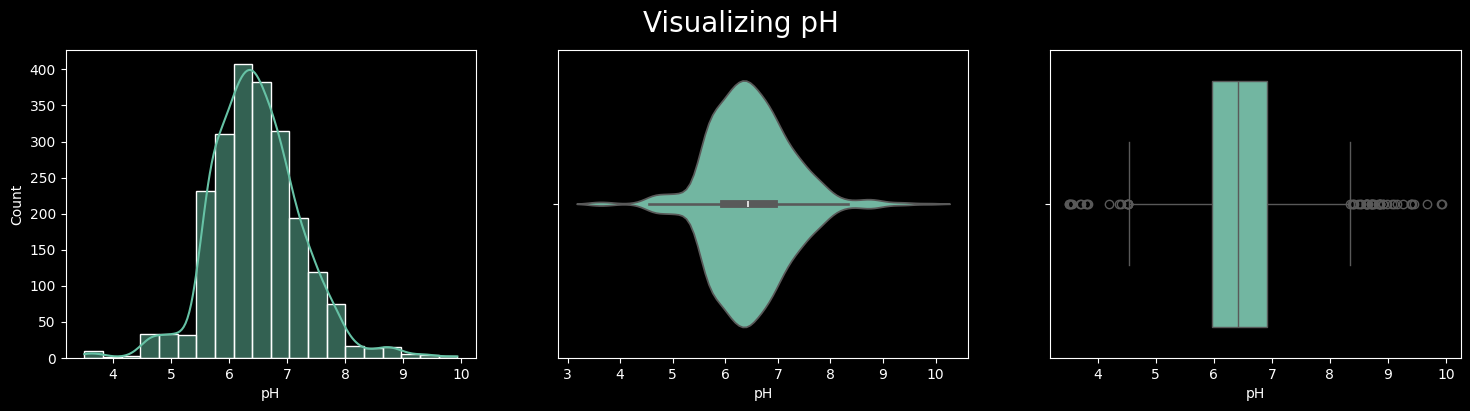

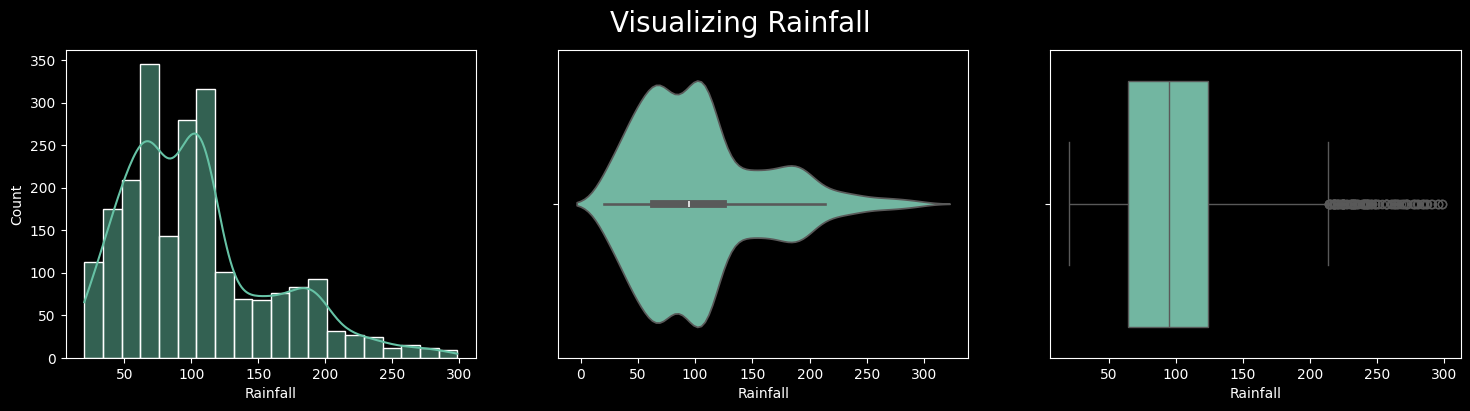

In [12]:
#distribution and density of values
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [13]:
#alphabetically arranging crops with their mean value
grouped = df.groupby(by='Label').mean().reset_index()
grouped

Label  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
0         apple     20.80      134.22     199.89    22.630942  92.333383   
1        banana    100.23       82.01      50.05    27.376798  80.358123   
2     blackgram     40.02       67.47      19.24    29.973340  65.118426   
3      chickpea     40.09       67.79      79.92    18.872847  16.860439   
4       coconut     21.98       16.93      30.59    27.409892  94.844272   
5        coffee    101.20       28.74      29.94    25.540477  58.869846   
6        cotton    117.77       46.24      19.56    23.988958  79.843474   
7        grapes     23.18      132.53     200.11    23.849575  81.875228   
8          jute     78.40       46.86      39.99    24.958376  79.639864   
9   kidneybeans     20.75       67.54      20.05    20.115085  21.605357   
10       lentil     18.77       68.36      19.41    24.509052  64.804785   
11        maize     77.76       48.44      19.79    22.389204  65.092249   
12        mango     20.07       27.18      29.92    31.208770  50.156573   
13    mothbeans     21.44       48.01      20.23    28.194920  53.160418   
14     mungbean     20.99       47.28      19.87    28.525775  85.499975   
15    muskmelon    100.32       17.72      50.08    28.663066  92.342802   
16       orange     19.58       16.55      10.01    22.765725  92.170209   
17       papaya     49.88       59.05      50.04    33.723859  92.403388   
18   pigeonpeas     20.73       67.73      20.29    27.741762  48.061633   
19  pomegranate     18.87       18.75      40.21    21.837842  90.125504   
20         rice     79.89       47.58      39.87    23.689332  82.272822   
21   watermelon     99.42       17.00      50.22    25.591767  85.160375   

          pH    Rainfall  
0   5.929663  112.654779  
1   5.983893  104.626980  
2   7.133952   67.884151  
3   7.336957   80.058977  
4   5.976562  175.686646  
5   6.790308  158.066295  
6   6.912675   80.398043  
7   6.025937   69.611829  
8   6.732778  174.792798  
9   5.749411  105.919778  
10  6.927932   45.680454  
11  6.245190   84.766988  
12  5.766373   94.704515  
13  6.831174   51.198487  
14  6.723957   48.403601  
15  6.358805   24.689952  
16  7.016957  110.474969  
17  6.741442  142.627839  
18  5.794175  149.457564  
19  6.429172  107.528442  
20  6.425471  236.181114  
21  6.495778   50.786219

# **Comparision of Mean Attributes of various classes**

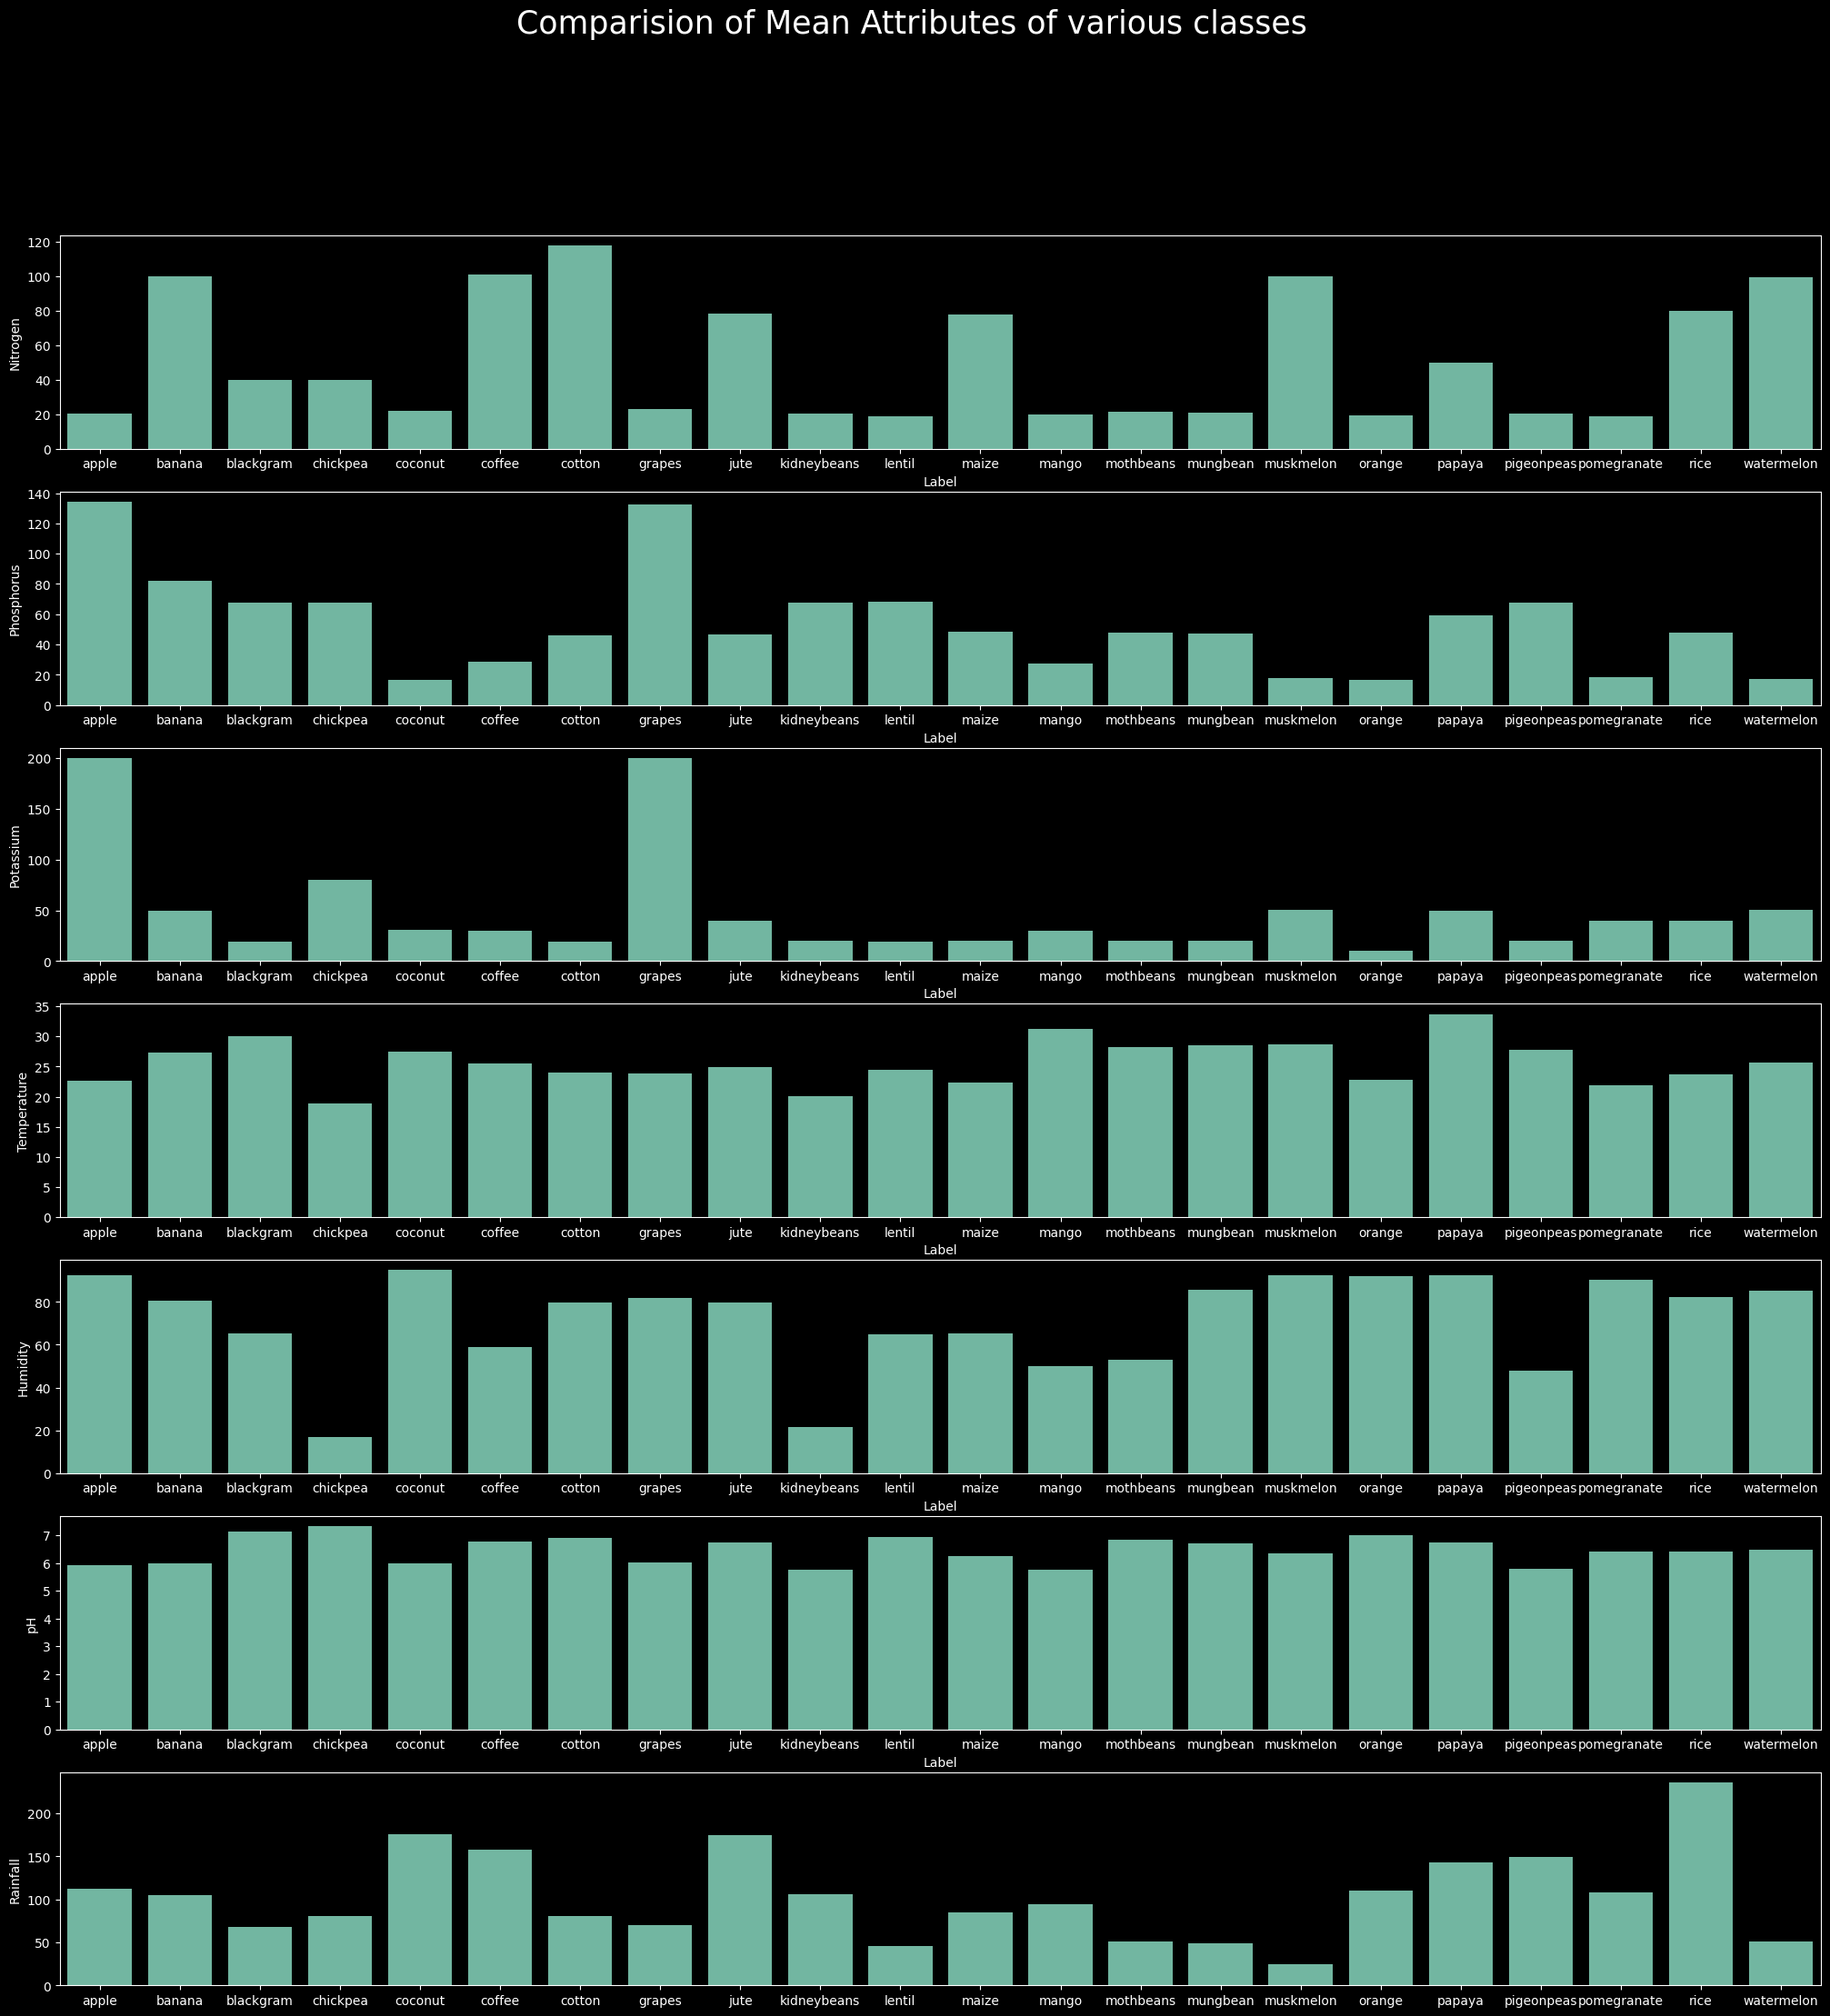

In [14]:
fig,ax=plt.subplots(7,1,figsize=(25,25))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='Label',y=i,ax=ax[index])
    plt.suptitle("Comparision of Mean Attributes of various classes",size=25)
    plt.xlabel("")

**# Observations:**
*   Cotton requires most Nitrogen.
*   Apple requires most Phosphorus.
*   Grapes require most Potassium.
*   Papaya requires a hot climate.
*   Coconut requires a humid climate.
*   Chickpea requires high pH in soil.
*   Rice requires huge amount of Rainfall.


# **Top 5 most requiring Crops**

In [15]:
# Top 5 most requiring Crops
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most Nitrogen requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most Phosphorus requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most Potassium requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most Temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most Humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34

# **Top 5 least requiring Crops**

In [16]:
# Top 5 least requiring Crops
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Least Nitrogen requiring crops:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 Least Phosphorus requiring crops:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 Least Potassium requiring crops:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 Least Temperature requiring crops:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 Least Humidity requiring crops:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pige

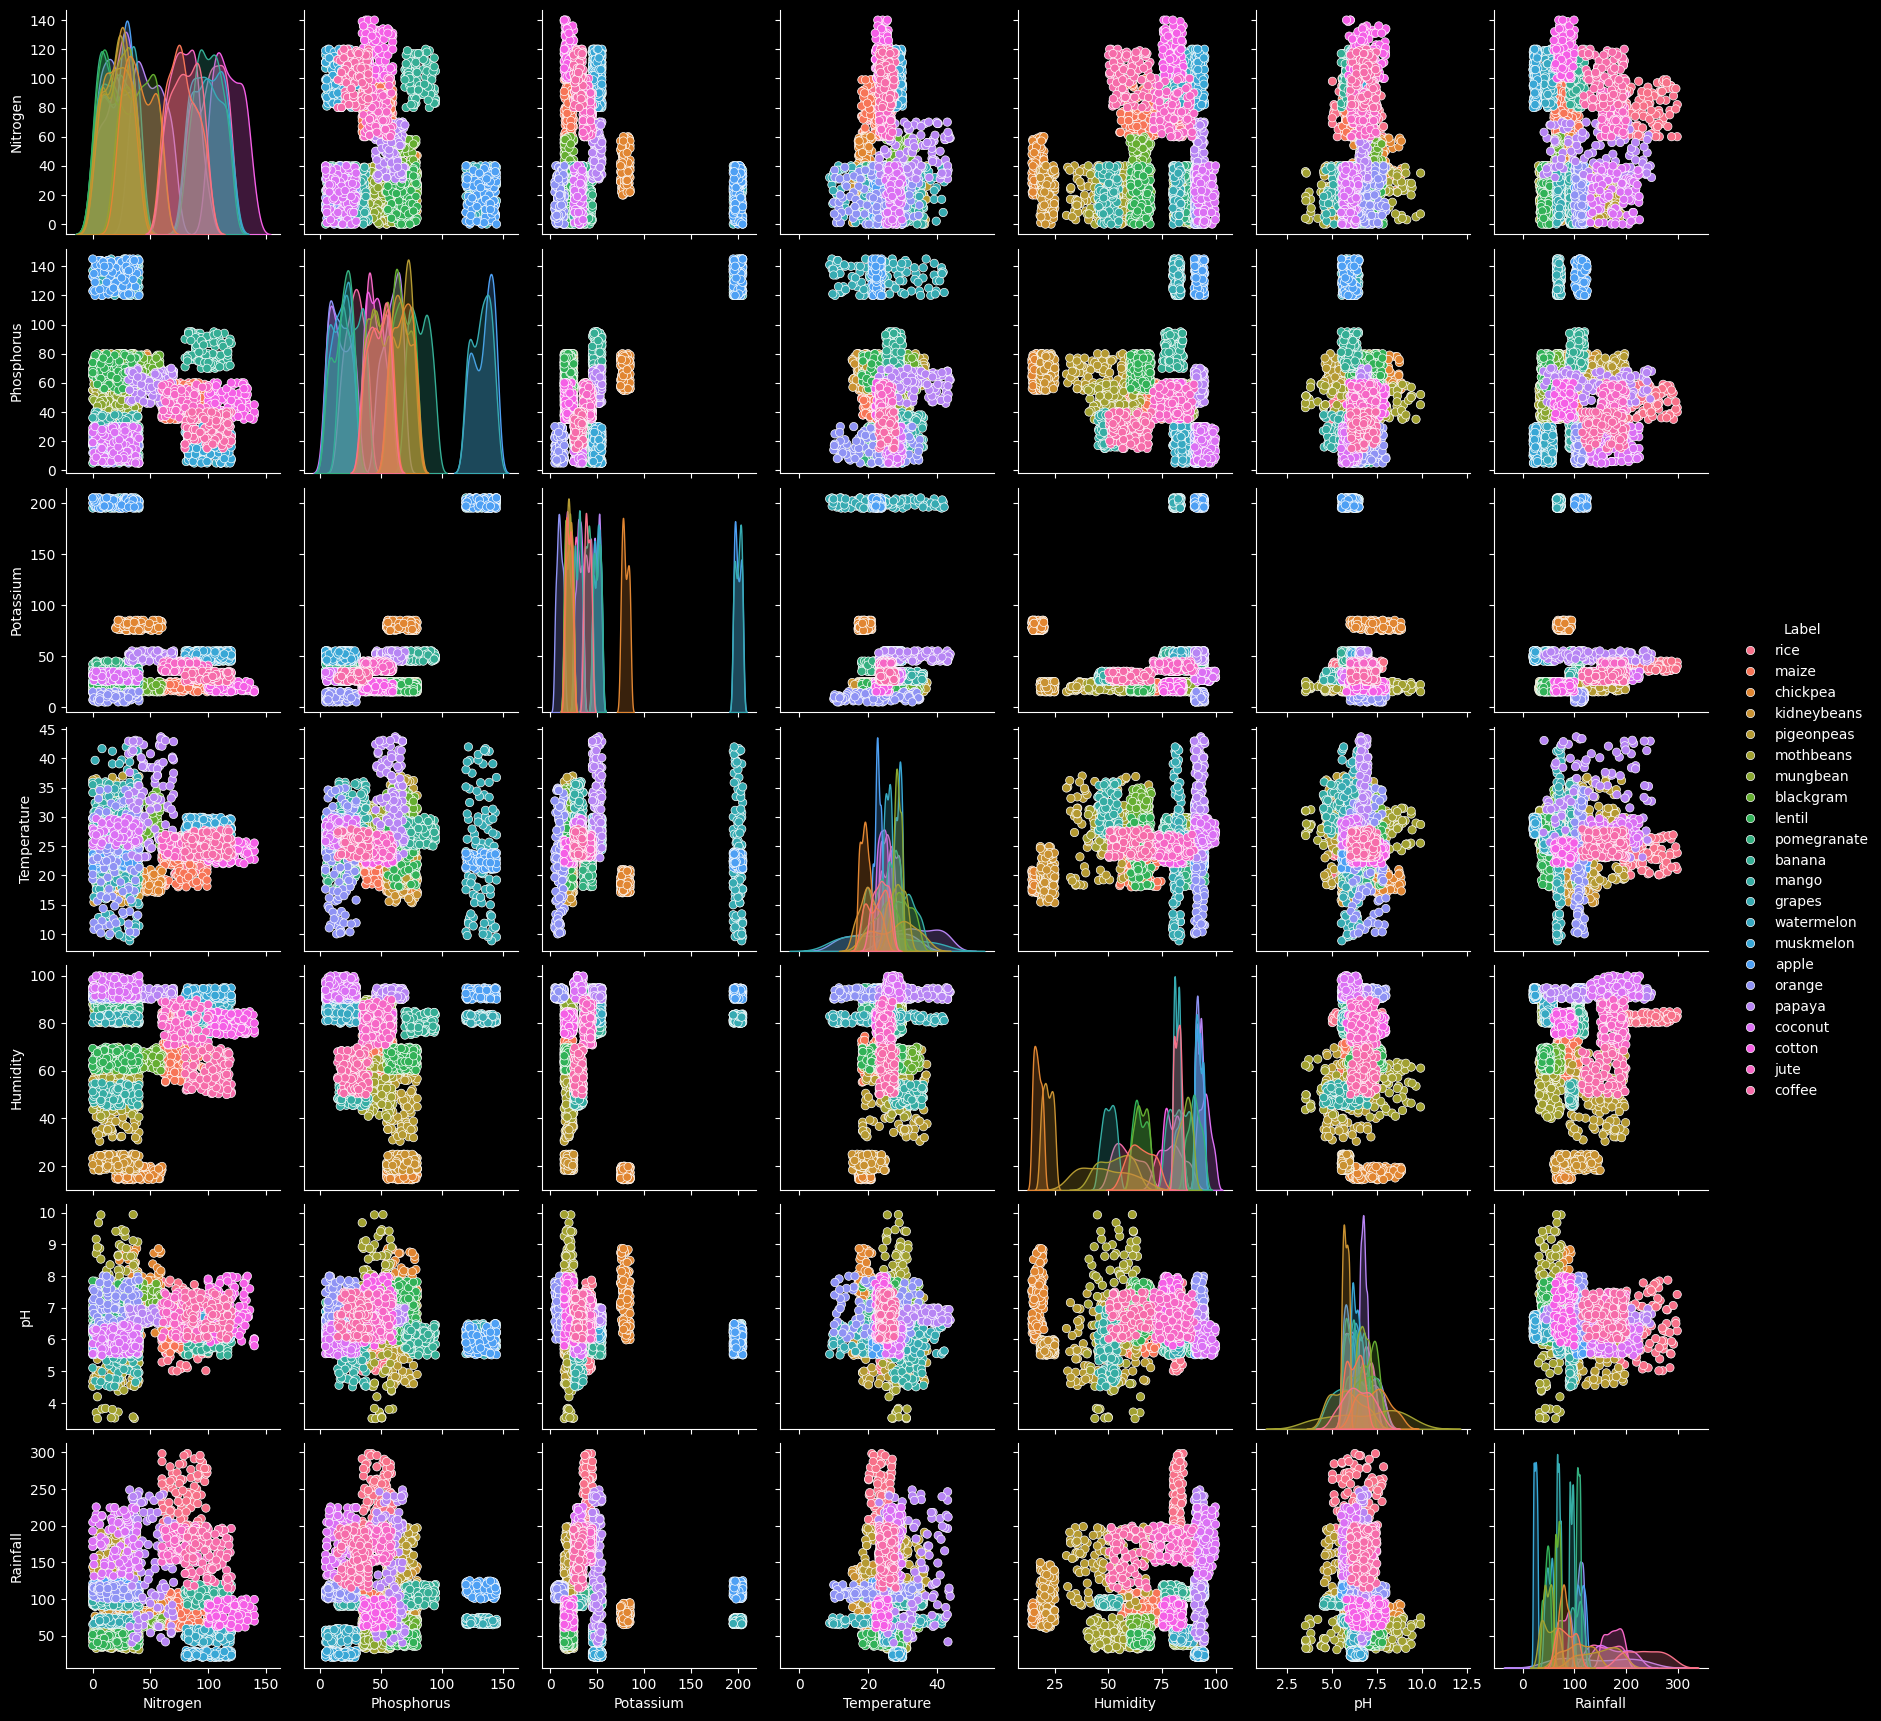

In [17]:
sns.pairplot(data=df,hue='Label')
plt.show()

# **Correlation Analysis**

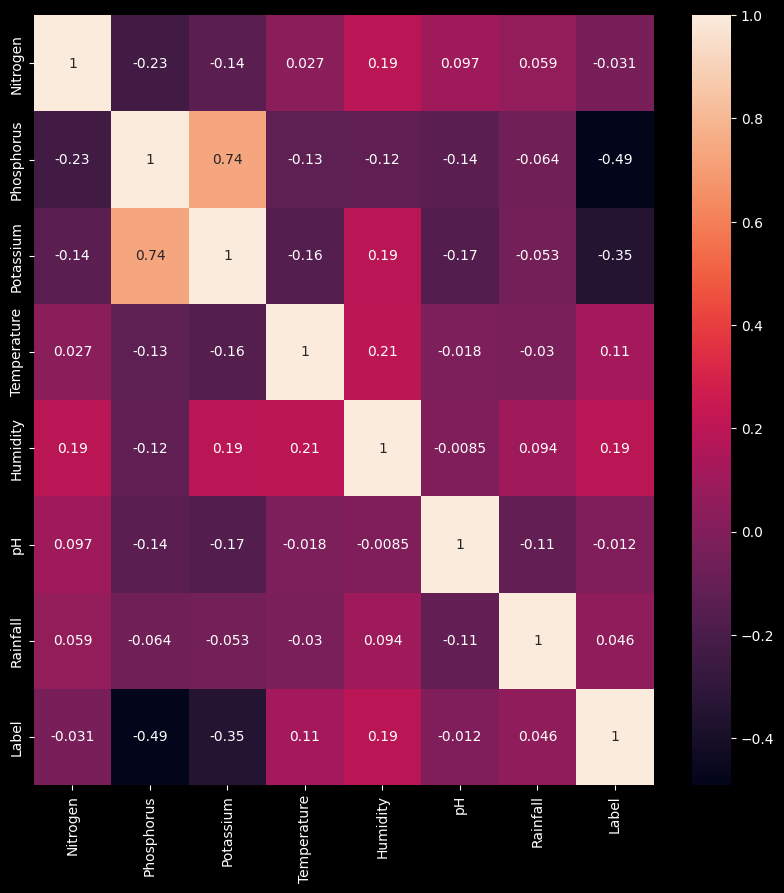

In [18]:
# Convert 'Label' column to numerical representation using LabelEncoder
# Correlation Analysis

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

A strong positive correlation between Potassium and Phosphorus is observed.

# **Count of different Crop classes**

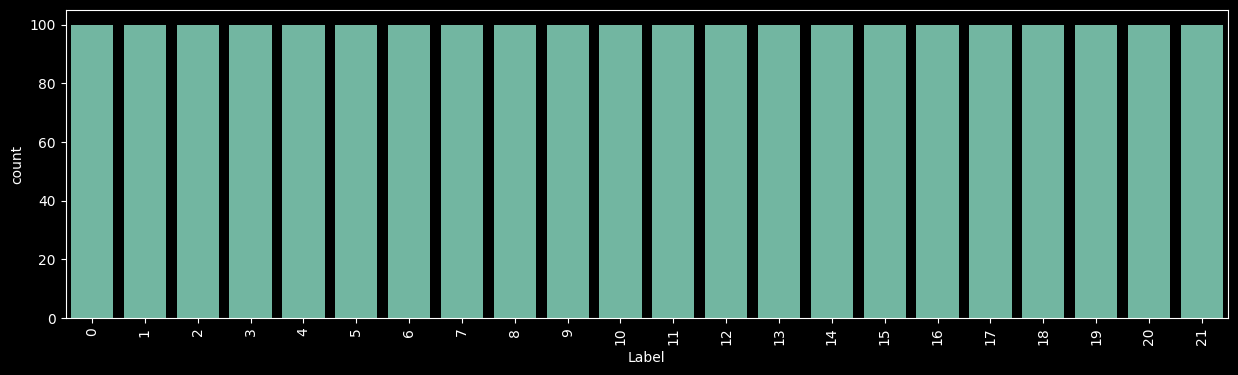

In [19]:
# count of different crop classes
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Label')
plt.xticks(rotation = 90)
plt.show()

The classes are evenly distributed, making accuracy a suitable metric for evaluation.

# **Soil Nutrient Analysis (N, P, K)**

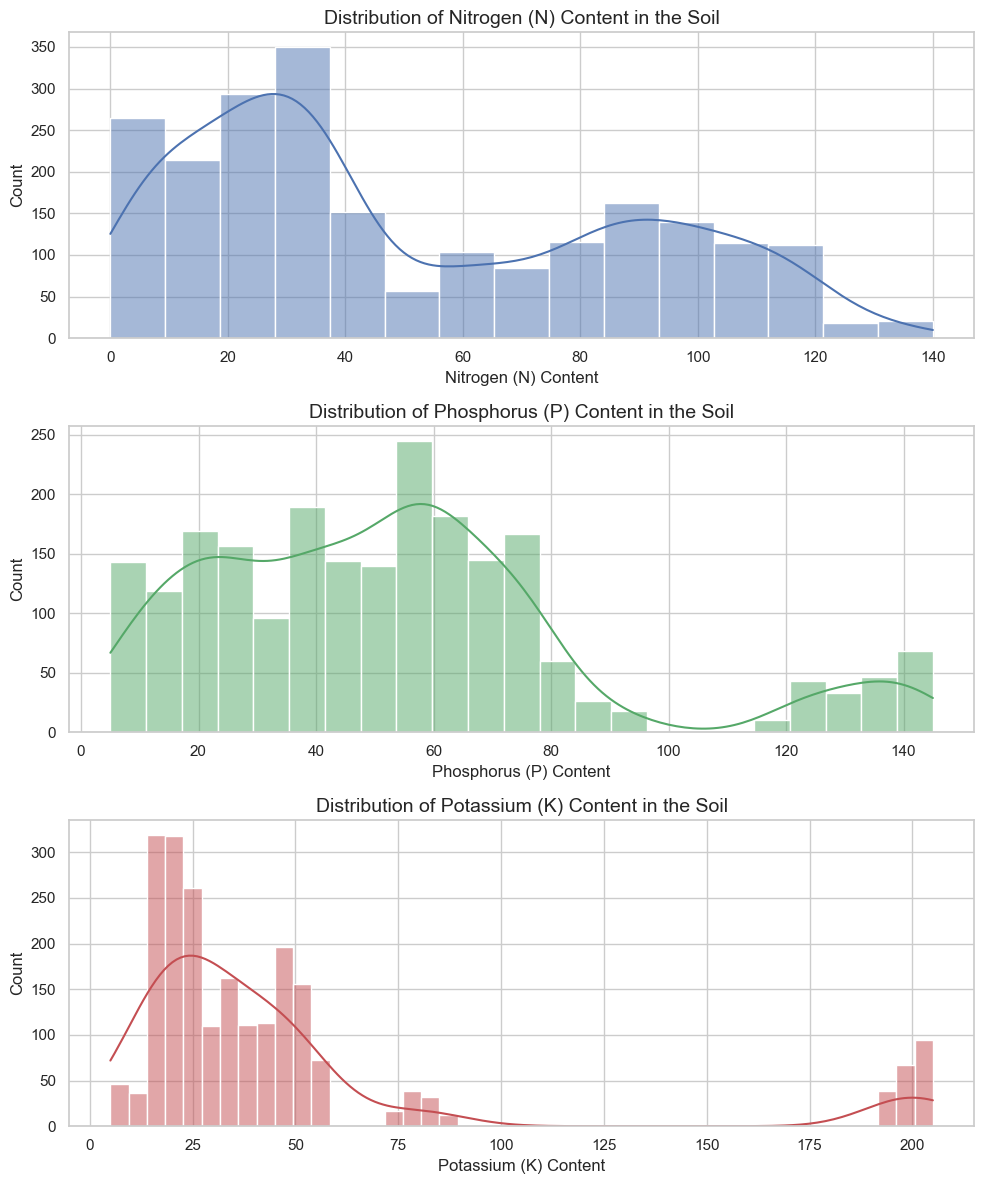

In [20]:
sns.set(style="whitegrid")

# Create subplots to show the distribution of N, P, and K content in the soil
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Nitrogen (N) distribution
sns.histplot(df['Nitrogen'], kde=True, color='b', ax=axs[0]) # Changed 'N' to 'Nitrogen'
axs[0].set_title('Distribution of Nitrogen (N) Content in the Soil', fontsize=14)
axs[0].set_xlabel('Nitrogen (N) Content', fontsize=12)

# Phosphorus (P) distribution
sns.histplot(df['Phosphorus'], kde=True, color='g', ax=axs[1]) # Changed 'P' to 'Phosphorus'
axs[1].set_title('Distribution of Phosphorus (P) Content in the Soil', fontsize=14)
axs[1].set_xlabel('Phosphorus (P) Content', fontsize=12)

# Potassium (K) distribution
sns.histplot(df['Potassium'], kde=True, color='r', ax=axs[2]) # Changed 'K' to 'Potassium'
axs[2].set_title('Distribution of Potassium (K) Content in the Soil', fontsize=14)
axs[2].set_xlabel('Potassium (K) Content', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# **Environmental Factor Analysis (Temperature, Humidity, Rainfall)**

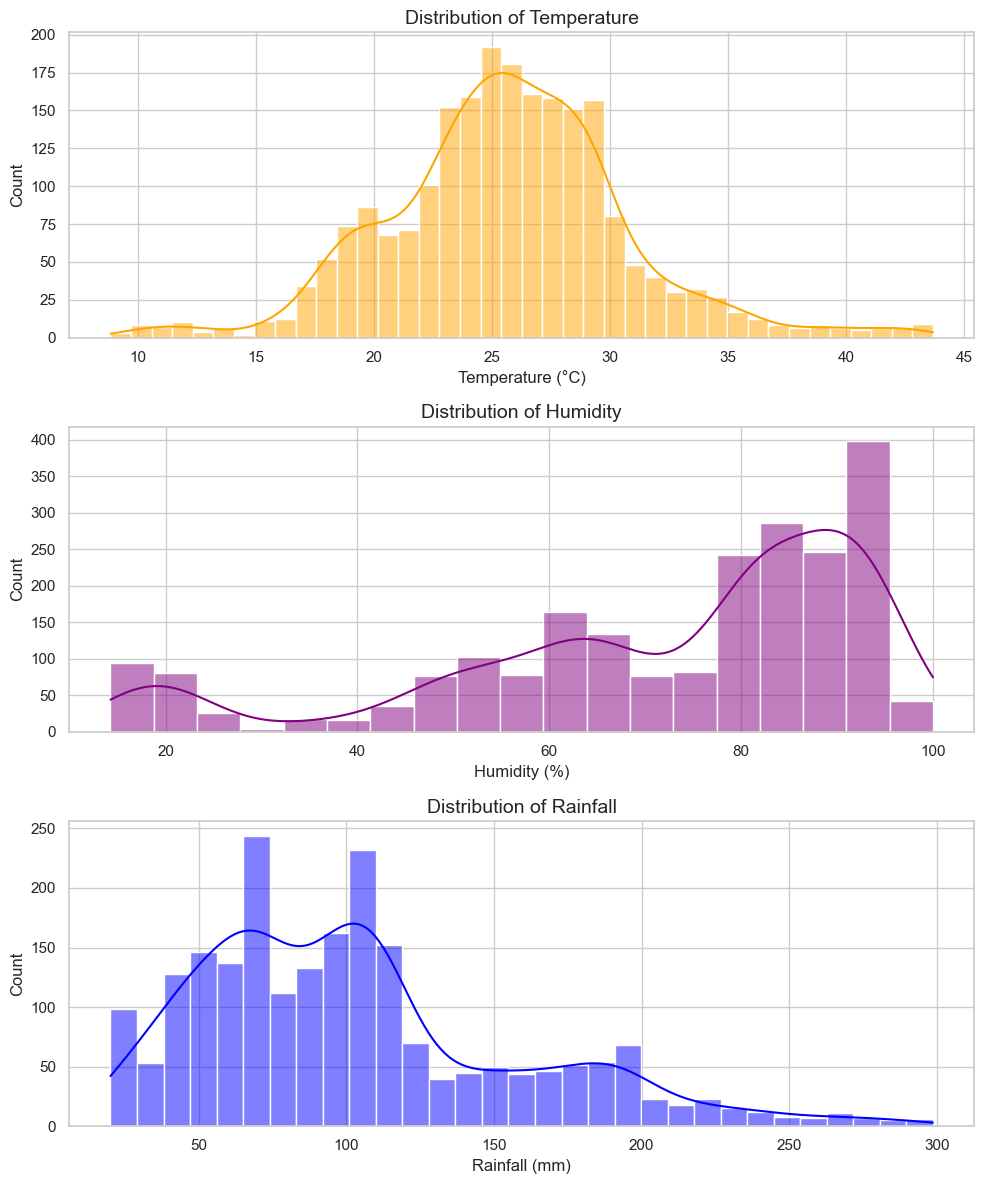

In [21]:
sns.set(style="whitegrid")

# Create subplots to show the distribution of Temperature, Humidity, and Rainfall
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Temperature distribution
sns.histplot(df['Temperature'], kde=True, color='orange', ax=axs[0]) # Changed 'temperature' to 'Temperature'
axs[0].set_title('Distribution of Temperature', fontsize=14)
axs[0].set_xlabel('Temperature (°C)', fontsize=12)

# Humidity distribution
sns.histplot(df['Humidity'], kde=True, color='purple', ax=axs[1]) # Changed 'humidity' to 'Humidity'
axs[1].set_title('Distribution of Humidity', fontsize=14)
axs[1].set_xlabel('Humidity (%)', fontsize=12)

# Rainfall distribution
sns.histplot(df['Rainfall'], kde=True, color='blue', ax=axs[2]) # Changed 'rainfall' to 'Rainfall'
axs[2].set_title('Distribution of Rainfall', fontsize=14)
axs[2].set_xlabel('Rainfall (mm)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# **pH Analysis**

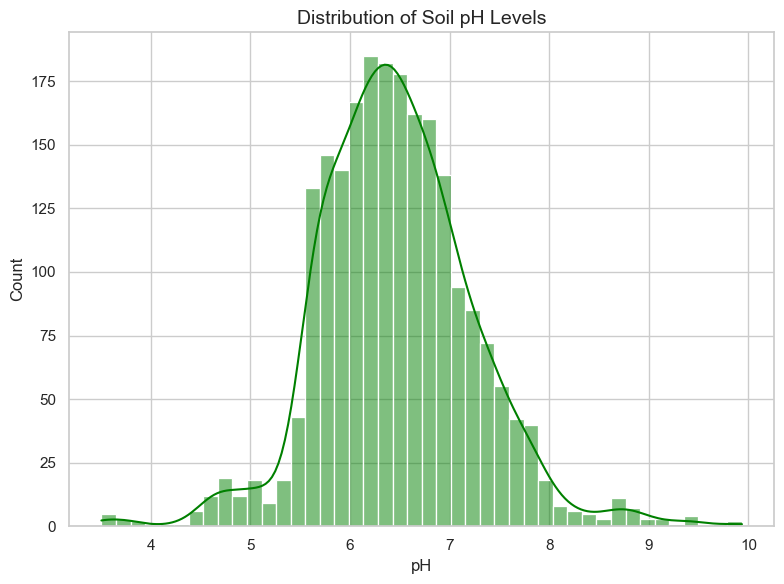

In [22]:
sns.set(style="whitegrid")

# Create a plot to show the distribution of pH levels in the soil
plt.figure(figsize=(8, 6))

# pH distribution
sns.histplot(df['pH'], kde=True, color='green') # Changed 'ph' to 'pH'
plt.title('Distribution of Soil pH Levels', fontsize=14)
plt.xlabel('pH', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# **Crop Suitability Patterns**

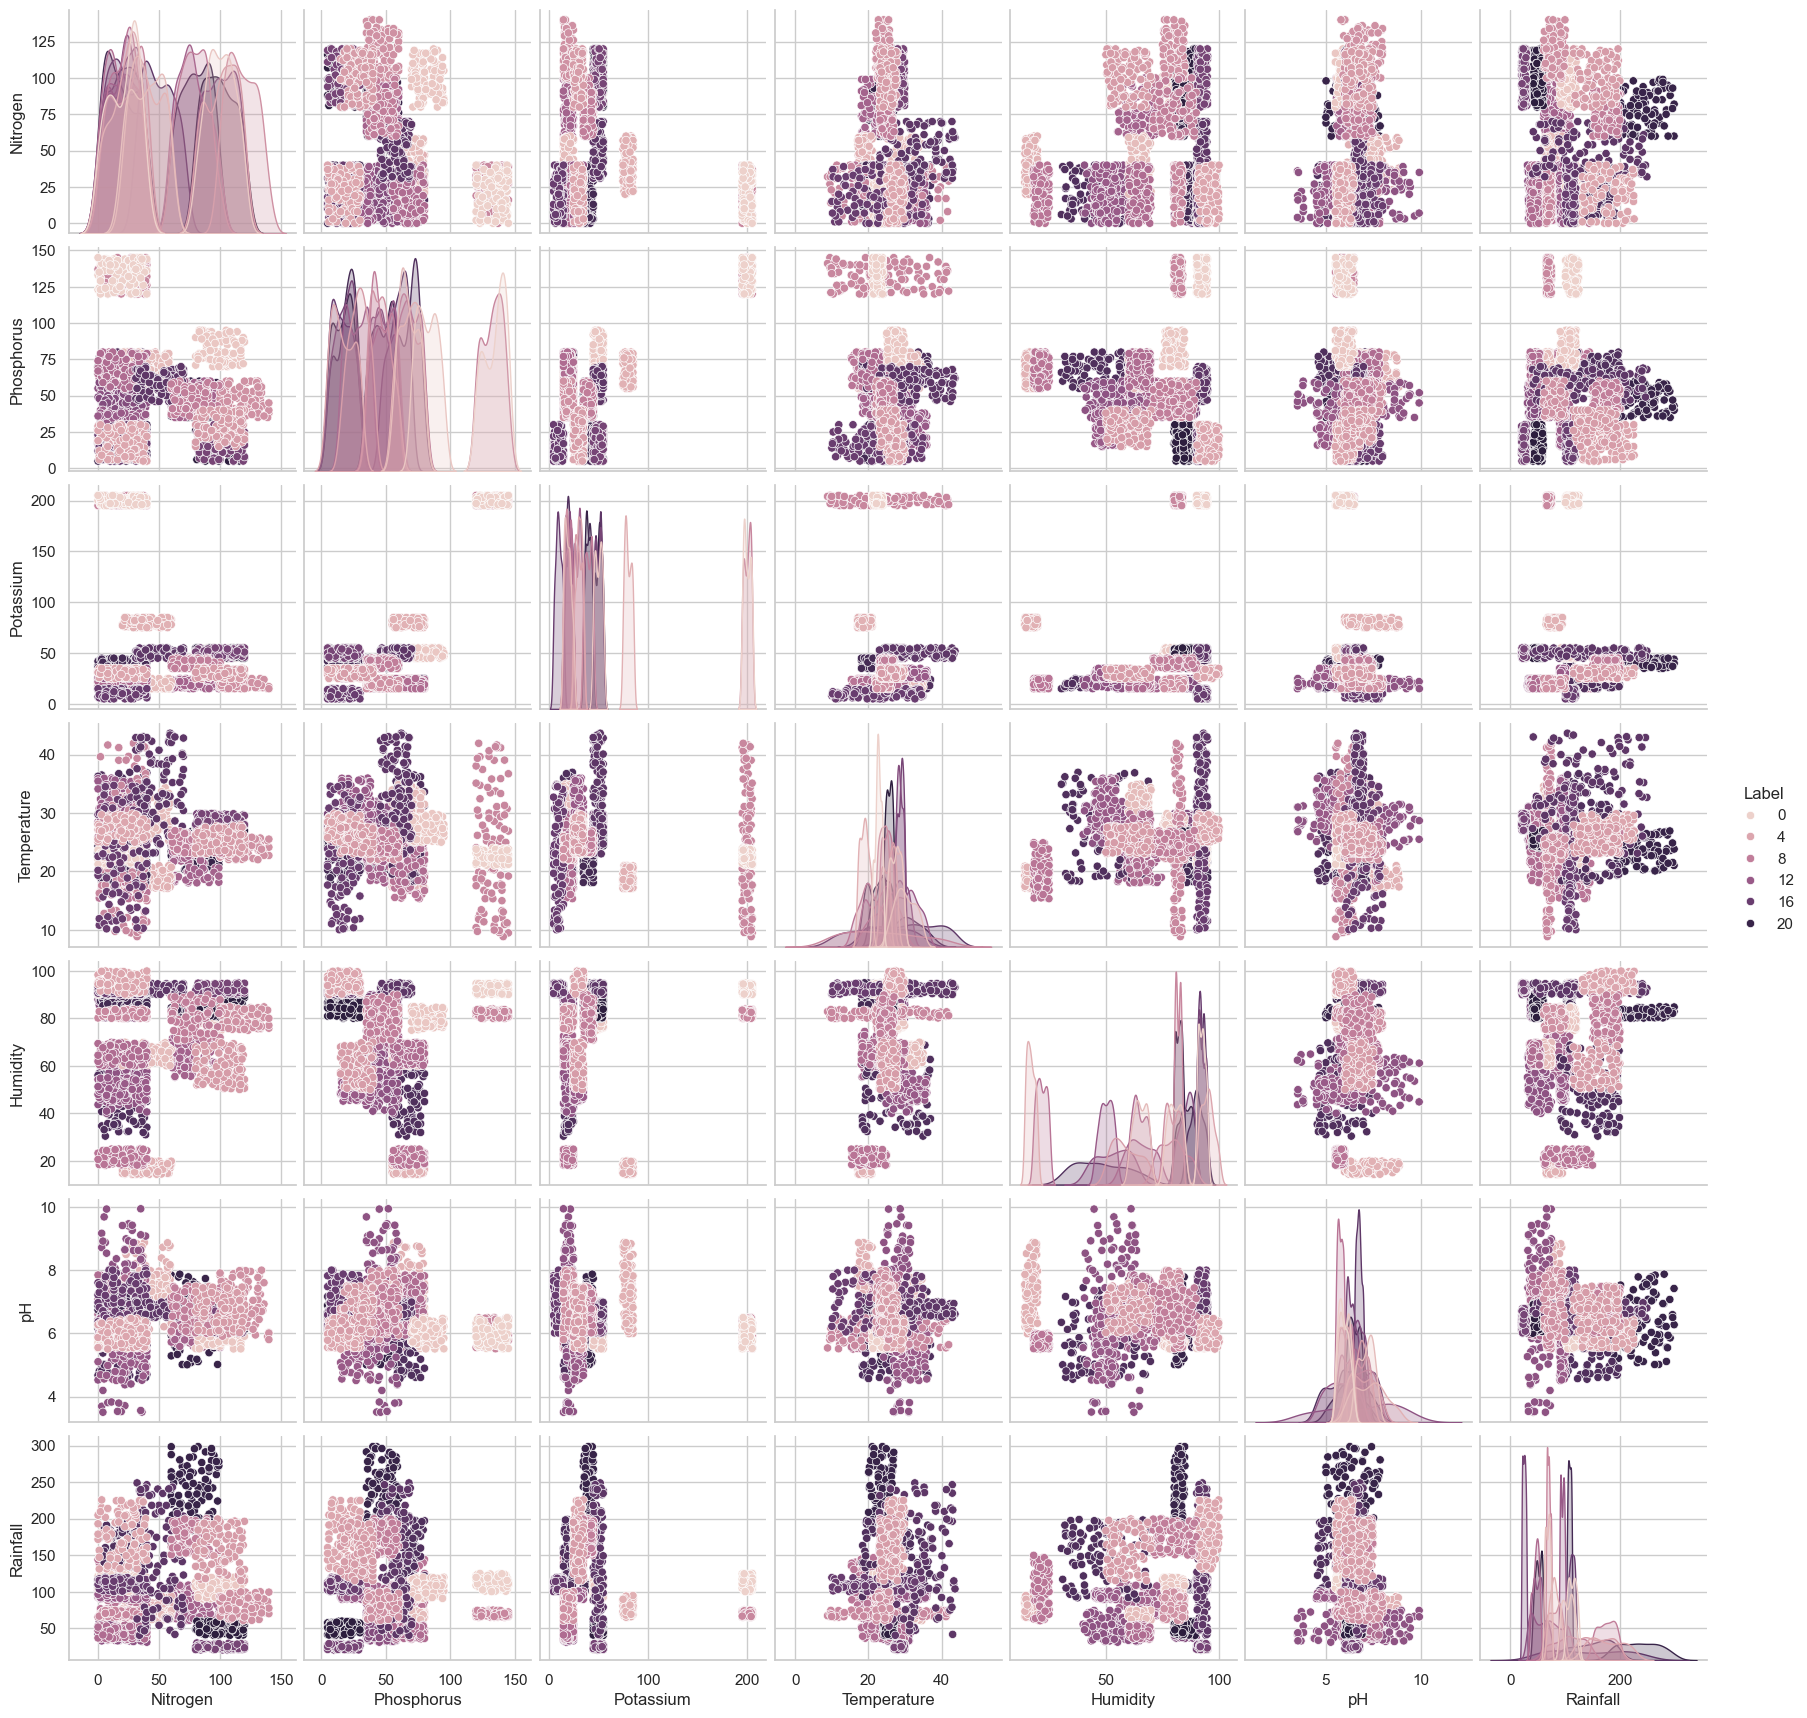

In [23]:
sns.set(style="whitegrid")

# Create pair plots to show relationships among nutrients and crop types
sns.pairplot(df, hue='Label', vars=['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall'])

# Show plot
plt.show()

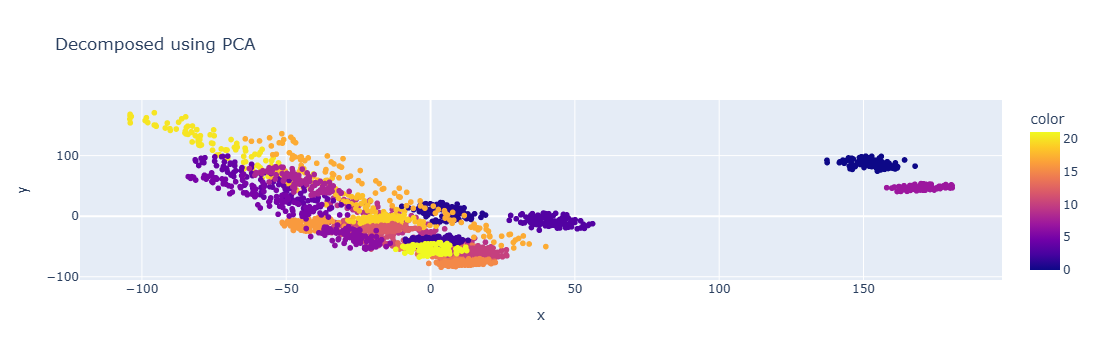

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['Label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=df['Label'],title="Decomposed using PCA")
fig.show()

In [25]:
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['Label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['Label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [26]:
fig = px.scatter(x=df['Nitrogen'],y=df['Phosphorus'],color=df['Label'],title="Nitrogen VS Phosphorus")
fig.show()

In [27]:
fig = px.scatter(x=df['Phosphorus'],y=df['Potassium'],color=df['Label'],title="Phosphorus VS Potassium")
fig.show()

In [28]:
fig = px.scatter(x=df['Nitrogen'], y=df['Potassium'], color=df['Label'], title="Nitrogen VS Potassium")
fig.show()

In [29]:
names = df['Label'].unique()

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])
df.head()

Nitrogen  Phosphorus  Potassium  Temperature   Humidity        pH  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Label  
0  202.935536     20  
1  226.655537     20  
2  263.964248     20  
3  242.864034     20  
4  262.717340     20

In [31]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Calculate metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

print(f'Logistic Regression: Accuracy: {accuracy_log}, Precision: {precision_log}, Recall: {recall_log}, F1-Score: {f1_log}')

Logistic Regression: Accuracy: 0.9477272727272728, Precision: 0.9492319170728263, Recall: 0.9477272727272728, F1-Score: 0.9476655277742234


# **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f'Decision Tree: Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1-Score: {f1_dt}')

Decision Tree: Accuracy: 0.9818181818181818, Precision: 0.9823637347500983, Recall: 0.9818181818181818, F1-Score: 0.9818173372521197


# **Support Vector Machine**

In [35]:
from sklearn.svm import SVC

# Create a support vector classifier
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'Support Vector Machine: Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}')

Support Vector Machine: Accuracy: 0.9613636363636363, Precision: 0.9672692837465565, Recall: 0.9613636363636363, F1-Score: 0.9612434056986235


# **K-Nearest Neighbors**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'k-NN: Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1-Score: {f1_knn}')

k-NN: Accuracy: 0.9704545454545455, Precision: 0.9739764067350275, Recall: 0.9704545454545455, F1-Score: 0.97031128472575


# **Accuracy Comparison of Different Models**

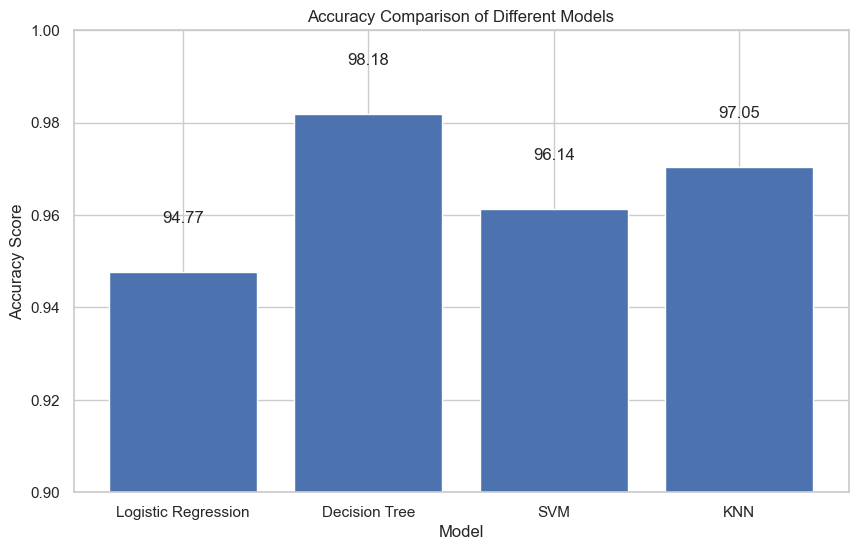

In [37]:
# Accuracy scores for each model
accuracy_scores = [accuracy_log, accuracy_dt, accuracy_svm, accuracy_knn]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization

# Add percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval * 100, 2), ha='center', va='bottom')

plt.show()

# **Model Performance Comparison**

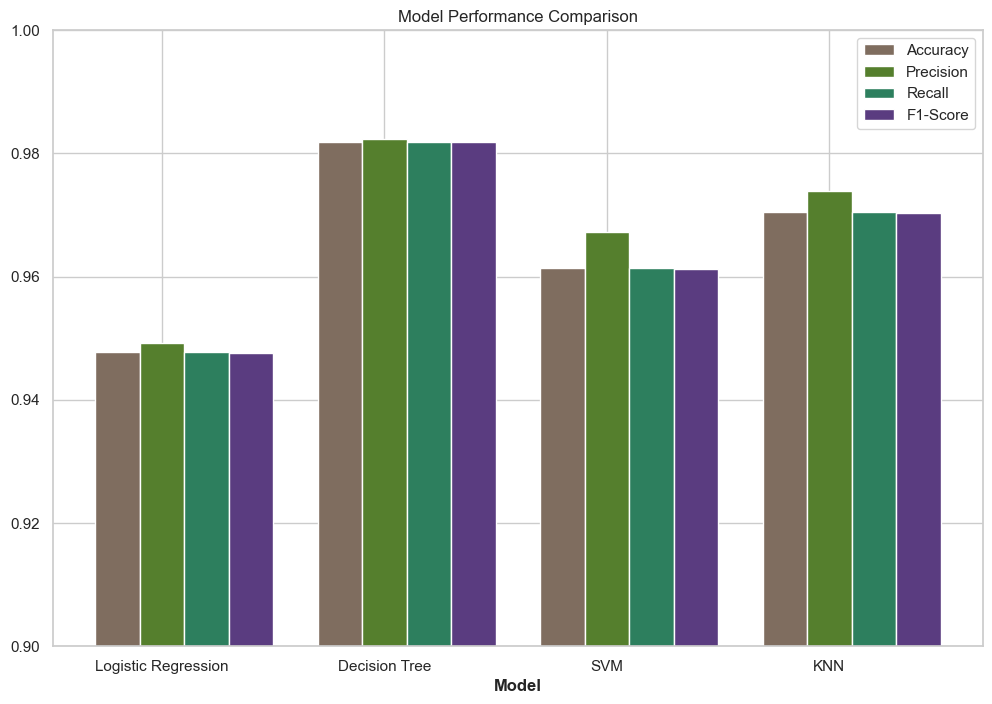

In [38]:
# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Metrics for each model
accuracy = [accuracy_log, accuracy_dt, accuracy_svm, accuracy_knn]
precision = [precision_log, precision_dt, precision_svm, precision_knn]
recall = [recall_log, recall_dt, recall_svm, recall_knn]
f1 = [f1_log, f1_dt, f1_svm, f1_knn]

# Set the width of the bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 8))
plt.bar(r1, accuracy, color='#7f6d5f', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='#557f2d', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='#2d7f5e', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1, color='#5a3c80', width=bar_width, edgecolor='white', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(accuracy))], model_names)

# Set y-axis limits
plt.ylim(0.9, 1.0)

# Create legend & Show graphic
plt.legend()
plt.title('Model Performance Comparison')
plt.show()

# **ROC Curves for Different Models**

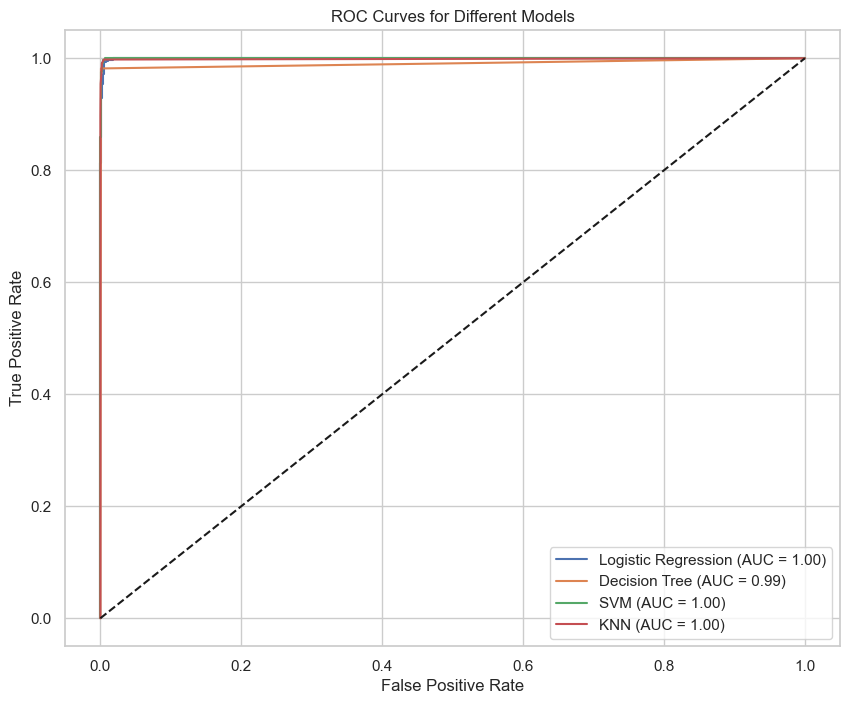

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Dicts to store results for each model
fpr = {}
tpr = {}
roc_auc = {}

# Models
models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'KNN': knn_model
}

# Iterate through each model
for model_name, model in models.items():
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr[model_name] = dict()
    tpr[model_name] = dict()
    roc_auc[model_name] = dict()
    for i in range(n_classes):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])

    # Compute micro-average ROC curve and ROC area
    fpr[model_name]["micro"], tpr[model_name]["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc[model_name]["micro"] = auc(fpr[model_name]["micro"], tpr[model_name]["micro"])

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name in models.keys():
    plt.plot(fpr[model_name]["micro"], tpr[model_name]["micro"],
             label=f'{model_name} (AUC = {roc_auc[model_name]["micro"]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()

# **Precision-Recall Curves for Different Models**

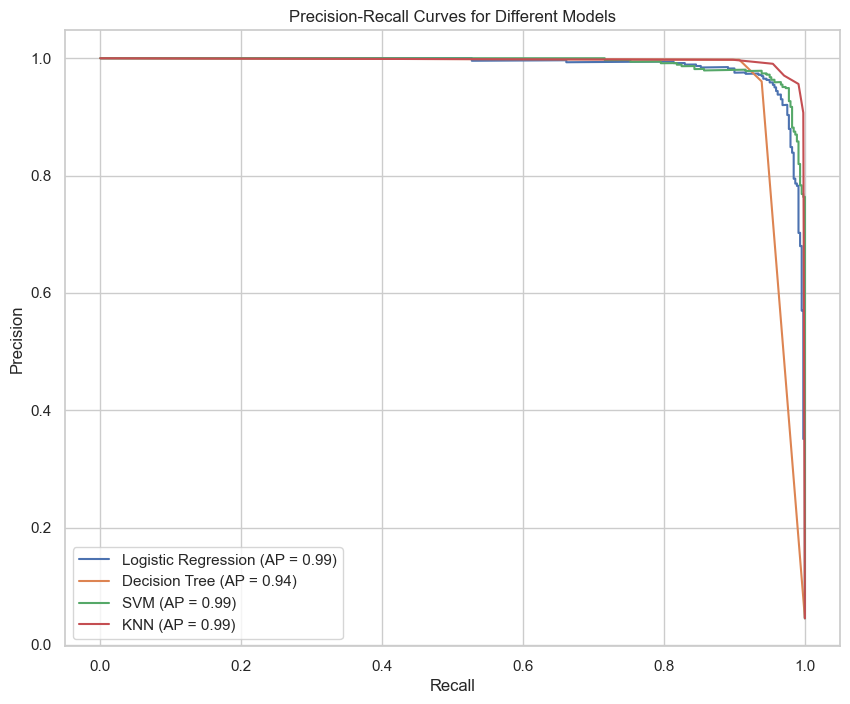

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Dicts to store results for each model
precision = {}
recall = {}
average_precision = {}

# Models
models = {
    'Logistic Regression': OneVsRestClassifier(log_model),
    'Decision Tree': OneVsRestClassifier(dt_model),
    'SVM': OneVsRestClassifier(svm_model),
    'KNN': OneVsRestClassifier(knn_model)
}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model on the binarized labels
    model.fit(X_train, y_train)

    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)

    # Check for NaN values and handle them (e.g., replace with 0)
    y_prob = np.nan_to_num(y_prob)

    # Compute precision-recall curve and average precision for each class
    precision[model_name] = dict()
    recall[model_name] = dict()
    average_precision[model_name] = dict()
    for i in range(n_classes):
        precision[model_name][i], recall[model_name][i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        average_precision[model_name][i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

    # Compute micro-average precision-recall curve and average precision
    precision[model_name]["micro"], recall[model_name]["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
    average_precision[model_name]["micro"] = average_precision_score(y_test_bin, y_prob, average="micro")

# Plot precision-recall curves for each model
plt.figure(figsize=(10, 8))
for model_name in models.keys():
    plt.plot(recall[model_name]["micro"], precision[model_name]["micro"],
             label=f'{model_name} (AP = {average_precision[model_name]["micro"]:.2f})')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()